# Анализ для сервиса проката самокатов GoFast

## Цель и задачи
**Цель**: проанализировать демографию пользователей и особенности использования самокатов, а также определить возможную выгоду от распространения платной подписки на самокаты. \
**Задачи**:
1. Загрузить данные
2. Предобработать данные
3. Провести исследовательсткий анализ
4. Объединить даннные
5. Подсчитать выручку
6. Проверить гипотезы
7. Смоделировать распределение длительности поездок

## Структура проекта
1. Загрузка данных
2. Предобработка данных
3. Исследовательсткий анализ
4. Объединение даннных
5. Подсчет выручки
6. Проверка гипотез
7. Распределение

## Загрузка данных

In [2]:
# Импортируем библиотеки
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats as st
import numpy as np

Выводим первые строки каждого датафрейма

In [3]:
df_users_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
df_rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
df_subscriptions_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Выводим информацию о каждом датафрейме

In [6]:
df_users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [7]:
df_rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
df_subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


### Промежуточные результаты:
* В первом датафрейме 1565 строк и 5 столбцов, нет видимых пропусков,возможно они скрыты заглушками, типы данных столбцов соответсвуют необходимым 
* В втором датафрейме 18068 строк и 4 столбца, строк больше, чем в первом из-за того, что один пользователь может совершить несколько поездок, это нормально, с пропусками та же ситуация, что и в первом датафрейме, тип данных для столбца date должен быть datetime, остальные в порядке, также останется проверить только на дубликаты
* В третьем датафрейме 2 столбца и две строки, пропусков нет, все типы даннных в порядке

## Предобработка данных

In [9]:
# Перевод столбеца date в датафрейме df_rides_go к типу даты pandas
df_rides_go['date'] = pd.to_datetime(df_rides_go['date'], yearfirst=True)
df_rides_go['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18068 entries, 0 to 18067
Series name: date
Non-Null Count  Dtype         
--------------  -----         
18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 141.3 KB


In [10]:
#Создание нового столбца month 
df_rides_go['month'] = df_rides_go['date'].dt.month
df_rides_go['month'].head()

0    1
1    1
2    4
3    8
4    8
Name: month, dtype: int32

In [11]:
users_go = ['user_id', 'name', 'age', 'city', 'subscription_type']
for col in users_go:
    print(df_users_go[col].unique())

[   1    2    3 ... 1532 1533 1534]
['Кира' 'Станислав' 'Алексей' 'Константин' 'Адель' 'Регина' 'Игорь' 'Юрий'
 'Ян' 'Валерий' 'Агата' 'Марк' 'Ева' 'Антонина' 'Валерия' 'Амалия'
 'Даниил' 'Аделина' 'Святогор' 'Борис' 'Вероника' 'Ростислав' 'Назар'
 'Эдуард' 'Василий' 'Денис' 'Тамара' 'Николай' 'Эвелина' 'Федор' 'Руслан'
 'Иван' 'Любовь' 'Ярослава' 'Майя' 'Ильдар' 'Данила' 'Нина' 'Стефания'
 'Ясмина' 'Дмитрий' 'Александр' 'Одиссей' 'Арсений' 'Алла' 'Таисия'
 'Максим' 'Юлиана' 'Павел' 'Карина' 'Алиса' 'Лидия' 'Рамиль' 'Родион'
 'Ника' 'Оксана' 'Анастасия' 'Маргарита' 'Вера' 'Тимур' 'Никита' 'Лев'
 'Влад' 'Артур' 'Анна' 'Ольга' 'Вячеслав' 'Ксения' 'Виталина' 'Владислав'
 'Тамерлан' 'Амина' 'Вадим' 'Олеся' 'Зарина' 'Егор' 'Гордей' 'Лилия'
 'Святослав' 'Роберт' 'Амир' 'Влада' 'Богдан' 'Полина' 'Марат' 'Елисей'
 'Макар' 'Алина' 'Глеб' 'Андрей' 'Альбина' 'Людмила' 'Марсель' 'Милена'
 'Диана' 'Дарина' 'Данил' 'Артемий' 'Лиана' 'Альберт' 'Герман' 'Жанна'
 'Нелли' 'Евгения' 'Ариана' 'Самира' 'За

In [12]:
rides_go = ['user_id', 'distance', 'duration','date']
for col in rides_go:
    print(df_rides_go[col].unique())

[   1    2    3 ... 1532 1533 1534]
[4409.9191402  2617.59215346  754.15980696 ... 3826.1855073  2902.30866066
 2371.71119224]
[25.59976897 15.81687145  6.23211346 ... 18.43505138 16.6743622
 15.89391697]
<DatetimeArray>
['2021-01-01 00:00:00', '2021-01-18 00:00:00', '2021-04-20 00:00:00',
 '2021-08-11 00:00:00', '2021-08-28 00:00:00', '2021-10-09 00:00:00',
 '2021-10-19 00:00:00', '2021-11-06 00:00:00', '2021-11-14 00:00:00',
 '2021-11-22 00:00:00',
 ...
 '2021-10-10 00:00:00', '2021-11-02 00:00:00', '2021-10-29 00:00:00',
 '2021-11-26 00:00:00', '2021-04-18 00:00:00', '2021-07-03 00:00:00',
 '2021-05-31 00:00:00', '2021-12-16 00:00:00', '2021-01-21 00:00:00',
 '2021-02-06 00:00:00']
Length: 364, dtype: datetime64[ns]


Судя по уникальным значениям скрытых пропусков нет. Проверим на дубликаты

In [13]:
# Проверим на дубликаты таблицу users_go
df_users_go.duplicated(keep='first').sum()

31

In [14]:
# Удалим дубликаты
df_users_go.drop_duplicates(keep='first', inplace=True)
df_users_go.duplicated(keep='first').sum()

0

In [15]:
# Проверим на дубликаты таблицу rides_go
df_rides_go.duplicated(keep='first').sum()

0

### Промежуточные результаты
* Столбец `date` таблицы `users_go` приведен к типу datetime
* Создан столбец `month` в таблице `users_go`
* Столбцы таблиц `users_go` и `rides_go` проверены на скрытые пропуски
* Из таблицы `users_go` удалена 31 дублирующаяся строка
* В таблице `rides_go` не было обнаружено дублирующихся строк
* Таблица `subscriptions_go` не проверялась так как содержит всего 2 строки

## Исследовательский анализ данных

In [16]:
# Соберем сведения о частоте встречаемости городов
df_users_go['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

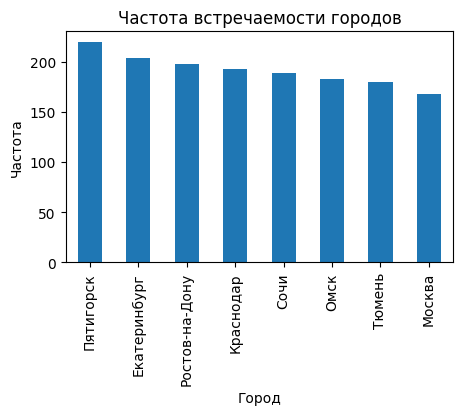

In [17]:
# Визуализируем данные
plt.figure(figsize = (5, 3))
df_users_go['city'].value_counts().plot(kind='bar')
plt.xlabel('Город')
plt.ylabel('Частота')
plt.title('Частота встречаемости городов')
plt.show()

Исходя из визуализации, чаще всего пользователи приложения из Пятигорска (219), меньше всего пользователей из Москвы (168)

In [18]:
# Подсчитаем долю пользователей с подпиской и без нее
ratio = round(df_users_go['subscription_type'].value_counts(normalize=True), 2)
ratio

subscription_type
free     0.54
ultra    0.46
Name: proportion, dtype: float64

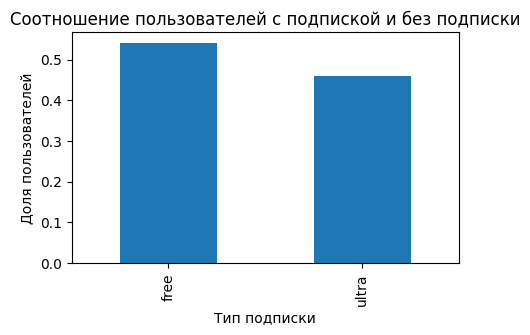

In [19]:
# Визуализируем данные
plt.figure(figsize = (5, 3))
ratio.plot(kind='bar')
plt.xlabel('Тип подписки')
plt.ylabel('Доля пользователей')
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show()

Исходя из полученных данных больше пользователей без подписки, однако не много (0.54, 0.46)

In [20]:
# Соберем сведения о частоте встречаемости городов
age = df_users_go['age'].value_counts().reset_index().sort_values(by='age')
age

,age,count
24,12,4
22,13,8
21,14,9
20,15,13
17,16,19
16,17,26
13,18,46
12,19,47
8,20,71
7,21,93


<Figure size 500x300 with 0 Axes>

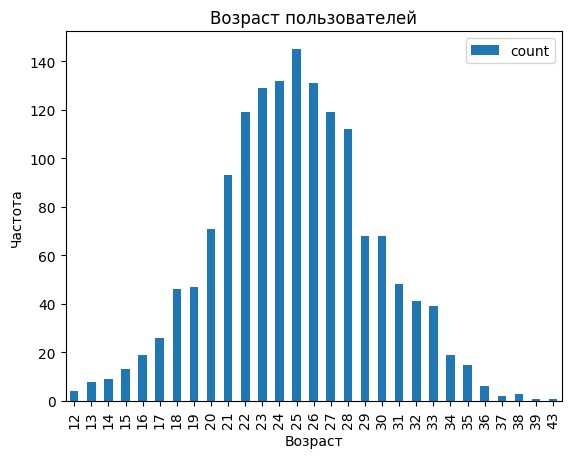

In [21]:
# Визуализируем данные
plt.figure(figsize = (5, 3))
age.plot(x='age', y='count', kind='bar')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Возраст пользователей')
plt.show()

Судя по графику частота возраста имеет распределение близкое к нормальному, наибольше количество пользователей сервиса сконцентрировано в диапозоне от 22 до 27 лет

In [22]:
#Подсчитываем среднее растояние поездки каждого пользователя
mean_distance = round(df_rides_go.groupby('user_id')['distance'].mean(), 2)
mean_distance

user_id
1       2839.18
2       3087.64
3       3075.63
4       3202.66
5       3232.45
         ...   
1530    2750.50
1531    2915.43
1532    2607.86
1533    2837.71
1534    3222.96
Name: distance, Length: 1534, dtype: float64

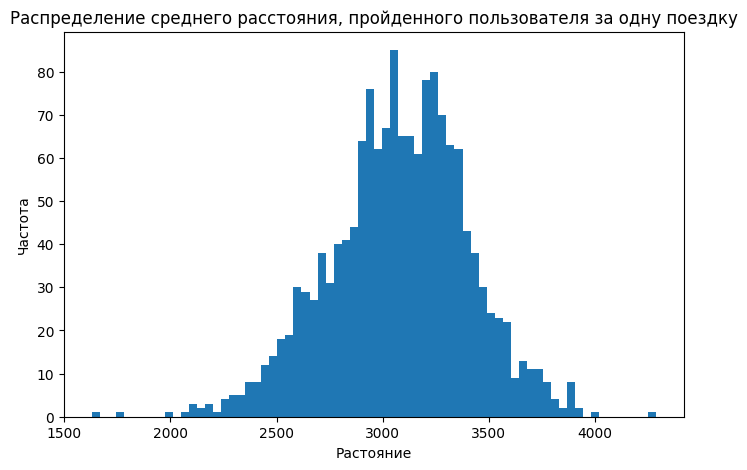

In [23]:
# Визуализируем распределение
plt.figure(figsize = (8, 5))
mean_distance.plot(kind='hist', bins=70)
plt.xlabel('Растояние')
plt.ylabel('Частота')
plt.title('Распределение среднего расстояния, пройденного пользователя за одну поездку')
plt.show()

Как видно на гистограмме растояние наибольшего объема поездок лежит в диапозоне между 2,7 и 3,5 км

In [24]:
#Подсчитываем среднее растояние поездки каждого пользователя
mean_duration = round(df_rides_go.groupby('user_id')['duration'].mean(), 2)
mean_duration

user_id
1       17.05
2       17.97
3       19.43
4       20.61
5       15.82
        ...  
1530    17.20
1531    17.75
1532    16.32
1533    18.51
1534    17.68
Name: duration, Length: 1534, dtype: float64

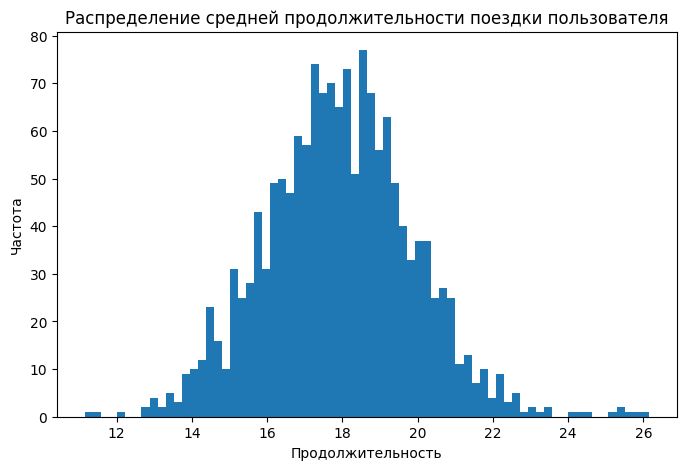

In [25]:
# Визуализируем распределение
plt.figure(figsize = (8, 5))
mean_duration.plot(kind='hist', bins=70)
plt.xlabel('Продолжительность')
plt.ylabel('Частота')
plt.title('Распределение средней продолжительности поездки пользователя')
plt.show()

В основном продолжительность поездок составляет от 16 до 21 минуты

### Промежуточные результаты:
* Подсчитаны и визуализированы: частота встречаемости городов, соотношение пользователей с подпиской и без, возраст пользователей, распеделение расстояния и дтельности поездки пользователя
* Наиболее частовстречающийся город - Пятигорск, наимеее - Москва
* Пользователей с подпиской на 8% меньше чем без нее
* Распределение возроста пользователей близко к нормальному, наибольшую часть пользователей составляют молодые люди от 22 до 27 лет
* Распределение среднего расстояния поездки также близко к нормальному, наибольшую долю поездок составляют поездки 2,7-3,5 км
* Распределение средней продолжительности сессии также близко к нормальному, наибольшую долю составляют поездки от 16 до 21 минуты

## Объединение данных

In [26]:
# Объединяем датафрейм
df = df_users_go.merge(df_rides_go, how='inner', on='user_id')
df = df.merge(df_subscriptions_go, how='inner', on='subscription_type')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


In [28]:
# Датафрейм с пользователями без подписки
df_users_without_subs = df[df['subscription_type'] == 'free']
df_users_without_subs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int32         
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.1+ MB


In [29]:
# Датафрейм с пользователями с подпиской
df_users_with_subs = df[df['subscription_type'] == 'ultra']
df_users_with_subs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int32         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 634.8+ KB


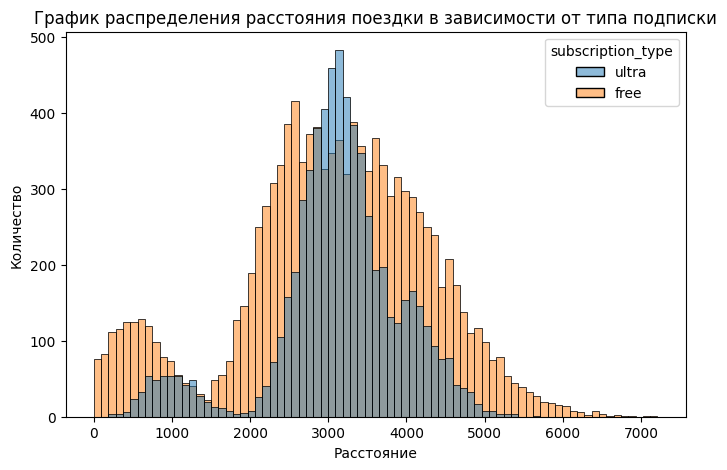

In [30]:
# Визуализация распределения расстояния поездки в зависимости от подписки
plt.figure(figsize = (8, 5))
sns.histplot(data=df, x='distance', hue='subscription_type')
plt.title('График распределения расстояния поездки в зависимости от типа подписки')
plt.ylabel('Количество')
plt.xlabel('Расстояние')
plt.show()

График распределения расстояния для пользователей с беплатной подпиской шире, однако для пользователей с платной выше, что говорит о том, что пользователи без подпиской чаще в целом используют сервис

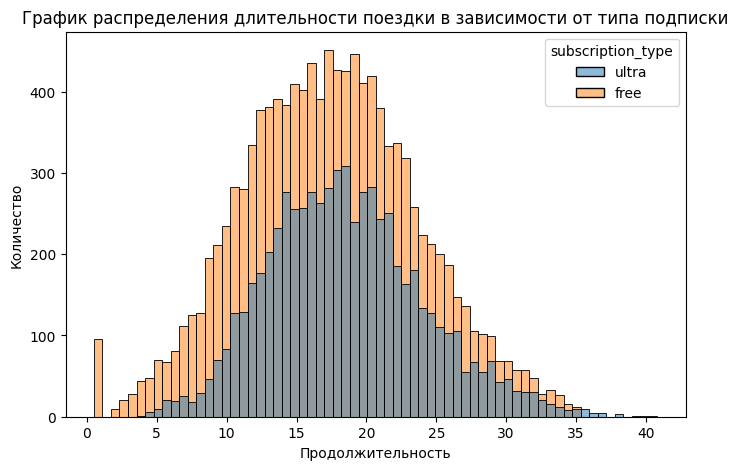

In [31]:
# Визуализация распределения длительности поездки в зависимости от подписки
plt.figure(figsize = (8, 5))
sns.histplot(data=df, x='duration', hue='subscription_type')
plt.title('График распределения длительности поездки в зависимости от типа подписки')
plt.ylabel('Количество')
plt.xlabel('Продолжительность')
plt.show()

По гистограмме заметно, что пользователи без подписки больше катаются на самокатах. У распределения пользователей с подпиской есть небольшой правый хвост, что говорит о том, что они чаще берут самокаты на длительные прогулки, в то время как у пользователей без подписки есть большой левый хвост, следовательно, они часто совершают короткие поездки

### Промежуточные результаты:
* 3 датафрейма объеденены в 1, его размер 18068 и 12 столбцов
* Созданы датафреймы с информацией о пользователях с и без подписки - df_users_with_subs и df_users_without_subs
* Визуализированы распределения и проделжительность поездок пользователь с без подписок
* Сделаны выводы, что пользователи без подписки чаще использую сервис, они часто используют их для коротких поездок, в то время как с подпиской - для дительных

## Подсчёт выручки

In [32]:
# Группируем датафрейм
grouped_df = df.groupby(['user_id', 'name', 'subscription_type', 'month'])
# Создаем дафатафрейм с агрегированными данными
agg_df = pd.DataFrame()
agg_df['sum_distance'] = grouped_df['distance'].sum()
agg_df['ride_cnt'] = grouped_df['distance'].count()
agg_df['sum_duration'] = grouped_df['duration'].sum()
agg_df = agg_df.reset_index()
agg_df.head()

,user_id,name,subscription_type,month,sum_distance,ride_cnt,sum_duration
0,1,Кира,ultra,1,7027.511294,2,41.416640
1,1,Кира,ultra,4,754.159807,1,6.232113
2,1,Кира,ultra,8,6723.470560,2,44.776802
3,1,Кира,ultra,10,5809.911100,2,31.578017
4,1,Кира,ultra,11,7003.499363,3,53.397424


In [33]:
agg_df = agg_df.merge(df_subscriptions_go, how='inner', on='subscription_type')
agg_df['revenue'] = agg_df['sum_duration'] * agg_df['minute_price'] + agg_df['subscription_fee']
agg_df = agg_df[['user_id', 'name', 'subscription_type',	'month', 'sum_distance', 'ride_cnt', 'sum_duration', 'revenue']]
agg_df

,user_id,name,subscription_type,month,sum_distance,ride_cnt,sum_duration,revenue
0,1,Кира,ultra,1,7027.511294,2,41.416640,447.499843
1,1,Кира,ultra,4,754.159807,1,6.232113,236.392681
2,1,Кира,ultra,8,6723.470560,2,44.776802,467.660815
3,1,Кира,ultra,10,5809.911100,2,31.578017,388.468102
4,1,Кира,ultra,11,7003.499363,3,53.397424,519.384541
...,...,...,...,...,...,...,...,...
11326,1534,Альберт,free,6,3409.468534,2,24.812678,198.501421
11327,1534,Альберт,free,8,7622.453034,2,47.205960,377.647678
11328,1534,Альберт,free,9,4928.173852,1,22.560373,180.482980
11329,1534,Альберт,free,11,13350.015305,4,76.342174,610.737395


### Промежуточные результаты
1. Проведена группировка по id, имени, типу подписки и месяцу
2. для каждого пользователя и месяца подсчитано суммарное расстояние, количество поездок, суммарная длительность, помесячная выручка

## Проверка гипотез

### Гипотеза о времени поездки для пользователей разных категорий
Гипотеза с 2 выборками (пользователи с подпиской и без) \
Гипотеза левосторонняя \
H0: Время поездки для пользователей с подпиской и без в среднем не отличается (μ1 - μ2 = 0) \
H1: Пользователи с подпиской тратят больше времени на поездки, чем пользователи без (μ1 - μ2 < 0) \
Проверка гипотезы будет осуществляться при α = 0.05

In [34]:
time_without_sub = df_users_without_subs['duration']
time_with_sub = df_users_with_subs['duration']

res = st.ttest_ind(time_without_sub,
                   time_with_sub, 
                   alternative='less')
print('p-value =', res.pvalue)

p-value = 1.2804098316645618e-34


p-value меньше α, следовательно отвергаем гипотезу H0

In [35]:
avg_time_without_sub = df_users_without_subs['duration'].mean()
avg_time_with_sub = df_users_with_subs['duration'].mean()

dif = round(avg_time_with_sub - avg_time_without_sub, 2)
perc_dif = round(dif / avg_time_without_sub * 100, 2)
print(perc_dif)

6.61


В среднем пользователи с подпиской тратят на 6,61% времени больше чем без. Судя по выборке можно сделать вывод, что пользователи с подпиской выгоднее для сервиса

### Гипотеза о среднем расстоянии поездки пользователей подписки
Гипотеза с 1 выборкой (пользователи с подпиской) \
Значение для сравнения 3130 метров  \
Гипотеза односторонняя\
H0: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 (μ1 = 3130) \
H1: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 (μ1  < 3130) \
Проверка гипотезы будет осуществляться при α = 0.05

In [36]:
distance_with_sub = df_users_with_subs['distance']

res = st.ttest_1samp(distance_with_sub,
                   3130, 
                   alternative='less')
print('p-value =', res.pvalue)

p-value = 0.08046311521502146


p-value больше α, следовательно мы не можем отвергать нулевую гипотезу. Тут нельзя однозначно сказать, что среднее расстояние меньше оптимального

### Гипотеза о пемесячной выручке для пользователей разных категорий
Гипотеза с 2 выборками (пользователи с подпиской и без) \
Гипотеза левосторонняя \
H0: Помесячная выручка для пользователей с подпиской и без в среднем не отличается (μ1 - μ2 = 0) \
H1: Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки (μ1 - μ2 < 0) \
Проверка гипотезы будет осуществляться при α = 0.05

In [37]:
rev_without_sub = agg_df[agg_df['subscription_type'] == 'free'].groupby('month')['revenue'].sum()
rev_with_sub = agg_df[agg_df['subscription_type'] == 'ultra'].groupby('month')['revenue'].sum()

res = st.ttest_ind(rev_without_sub,
                   rev_with_sub, 
                   alternative='less')
print('p-value =', res.pvalue)

p-value = 0.3245080348135175


p-value больше α, следовательно мы не можем отвергать нулевую гипотезу. \
Это не значит, что она верна или что альтернативная гипотеза не верна, это значит, нет статистически значимых доказательств того помесячная выручка пользователей с подпиской больше, чем у пользователей без нее

### Промежуточные результаты:
Проверены 3 гипотезы продакт-менеджеров
1. Первую гипотезу о том, что пользователи с подпиской тратят больше времени на поездки, чем пользователи без принимается. Действительно есть статистически значимые доказательства в ее пользу. Пользователи с подпиской в среднем тратят на 6.61% больше времени на поедки на самокате, чем пользователи без
2. Вторую гипотезу не можем принять. Данных недостаточно для того, чтобы утверждать, что среднее расстояние поездки пользователей подписки меньше, чем оптимального
3. Третью гипотезу также принять не можем. Так как не можем отвергнуть нулевую гипотезу 

##  Распределения
### Расчёт точечных оценок

In [57]:
# Расчёт средней длительности поездки
avg_duration = round(df['duration'].mean(), 2)
avg_duration

17.81

In [58]:
# Расчёт стандартного отклонения
std_dev = round(np.sqrt(np.var(df['duration'])), 2)
std_dev

6.09

### Расчёт вероятности, что поездка будет более 30 минут


In [59]:
# Вычисляем вероятность того, что поездка длится меньше или равно 30 минут
value = 30

dist = st.norm(avg_duration, std_dev)
prob_less = dist.cdf(value)

# Вычисляем вероятность того, что поездка длится больше 30 минут 
prob = round(1 - prob_less, 2)
prob

0.02

Вероятность поездки более 30 минут действительно мала

### Расчет вероятности, что поездка будет в интервале 20 - 30 минут

In [60]:
low = 20
high = 30

# Вычисляем вероятность
prob_int = round(dist.cdf(high) - dist.cdf(low), 2)
prob_int

0.34

Около трети поездок лежат в этом интервале, провести промоакцию для пользователей, совершающих такие поездки будет хорошим решением

### Определение критической дистанции

In [61]:
# Параметры нормального распределения
avg_dist = round(df['distance'].mean(), 2)
std_dev_dist = round(np.sqrt(np.var(df['distance'])), 2)

prob = 0.9
#Построение распределения
dist = st.norm(avg_dist, std_dev_dist)
# Расчет критической дистанции
crit_dist = round(dist.ppf(prob))
crit_dist

4502

Таким образом подходящая критическая дистанция это 4,502 километра

### Промежуточные результаты
1. Вероятность, что поездка будет длится более 30 минут, очень мала (0.02), поэтому скидку лучше не запускать
2. Вероятность, что поездка будет длиться от 20 до 30 минут примерно равна 1/3, запустить скидку для такой длительности будет хорошим решением
3. Критическая дистанция была расчитана в предаположении, что расстояния поездок распределены нормально, таким образом критическая дистанция равна 4,502 километра  

## Итоговые результаты
1. Данные предобработаны
2. Проведен исследовательский анализ данные, который был сопровожден визуализациями
3. Произведен подсчёт суммарной дистанции и длительности, количества поездок и выручки в разрезе каждого клиента и месяца
4. Проверены три продуктовые гипотезы, подтверждена только первая
5. Выяснено, что скидку можно ввести для поездок от 20 до 30 минут, а критичсекая дальность поездки составляет 4,5 километра, после этого расстояния должна вводиться дополнительная плата